In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
rcParams['figure.figsize'] = 15, 6
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
file_path="D:/Documents/Jupyter Notebooks/TimeSeries/Bases de Datos/"

Vamos a importar algunas bases de datos y a convertirlas en objetos de series de Tiempo. $\{X_t\}$

In [4]:
#Usamos Pandas para manejar las bases de Datos
#Importación de los datos
data = pd.ExcelFile(file_path+'Lluvia.xlsx')
print(data.sheet_names)
#Data Frame de la hoja "Datos"
df=data.parse('Hoja1')

display(df)
print(df.dtypes)


['Hoja1']


Fecha    lluvia
0   2009-01-01  3.758065
1   2009-02-01  4.235714
2   2009-03-01  4.764516
3   2009-04-01  5.400000
4   2009-05-01  4.438710
..         ...       ...
127 2019-08-01  5.354839
128 2019-09-01  5.680000
129 2019-10-01  7.583871
130 2019-11-01  6.850000
131 2019-12-01  4.713636

[132 rows x 2 columns]

Fecha     datetime64[ns]
lluvia           float64
dtype: object


In [3]:
%qtconsole

In [6]:
df['Fecha']=pd.to_datetime(df['Fecha'])###Sólo es necesario si no tiene formato de fecha
Lluvia=df.set_index('Fecha')
print(Lluvia.dtypes)
#ColCap

lluvia    float64
dtype: object


<class 'pandas.core.series.Series'>


Text(0.5, 1.0, 'Promedio de Lluvias Mensual')

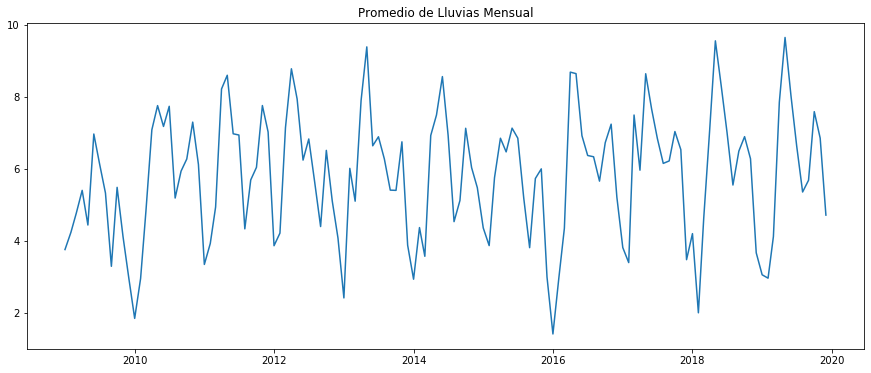

In [7]:
Lluviats=Lluvia['lluvia']
print(type(Lluviats))
plt.plot(Lluviats)
plt.title('Promedio de Lluvias Mensual') 
##%qtconsole

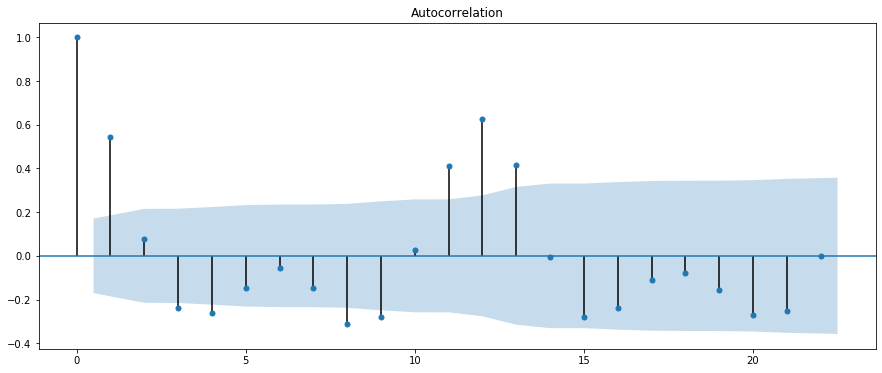

In [9]:
acfLluvias=plot_acf(Lluviats,adjusted=False)

Importar Serie Colcap

In [11]:
data = pd.ExcelFile(file_path+'Datos históricos COLCAP-3.xlsx')
print(data.sheet_names)
#Data Frame de la hoja "Datos"
df=data.parse('Hoja1')
display(df)
print(df.dtypes)

['Hoja1']


Fecha   Ultimo  Apertura   Máximo   Mínimo Vol.  % var.
0   2016-02-10  1200.42   1196.90  1204.90  1193.29    -  0.0029
1   2016-02-11  1198.51   1200.42  1200.42  1186.75    - -0.0016
2   2016-02-12  1209.03   1198.51  1214.20  1198.51    -  0.0088
3   2016-02-15  1209.88   1209.03  1213.31  1207.34    -  0.0007
4   2016-02-16  1199.98   1209.88  1222.96  1199.68    - -0.0082
..         ...      ...       ...      ...      ...  ...     ...
969 2020-01-31  1623.83   1638.15  1639.84  1620.83    - -0.0087
970 2020-02-03  1625.18   1623.83  1632.29  1620.52    -  0.0008
971 2020-02-04  1643.92   1625.18  1647.80  1625.18    -  0.0115
972 2020-02-05  1656.30   1643.92  1659.21  1643.92    -  0.0075
973 2020-02-06  1653.96   1656.30  1657.44  1646.25    - -0.0014

[974 rows x 7 columns]

Fecha       datetime64[ns]
Ultimo             float64
Apertura           float64
Máximo             float64
Mínimo             float64
Vol.                object
% var.             float64
dtype: object


In [29]:
%qtconsole

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


Text(0.5, 1.0, 'Precio de Cierre Diario Índice Colcap')

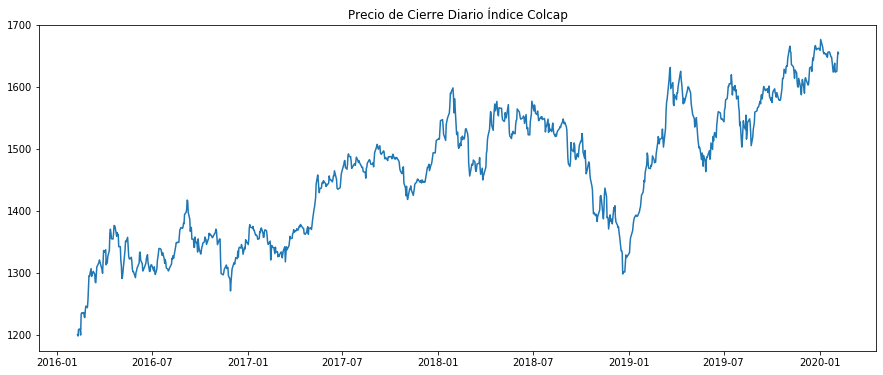

In [11]:
df['Fecha']=pd.to_datetime(df['Fecha'])###Sólo es necesario si no tiene formato de fecha
Colcap=df.set_index('Fecha')
print(type(Colcap))
#ColCap

Colcapts=Colcap['Ultimo']
print(type(Colcapts))
plt.plot(Colcapts)
plt.title('Precio de Cierre Diario Índice Colcap') 

/Users/sergiocalderonv/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


array([1.        , 0.99020624, 0.97972283, 0.9696249 , 0.95980785,
       0.95003862, 0.94066862, 0.9311621 , 0.92217913, 0.91309421,
       0.90371717, 0.89428453, 0.88495689, 0.87548721, 0.86577853,
       0.85618767, 0.8468862 , 0.83771222, 0.82870998, 0.82021213,
       0.81108521, 0.80232156, 0.79385582, 0.78553983, 0.77692406,
       0.76861912, 0.76077812, 0.75327303, 0.74616127, 0.73910119,
       0.73261845, 0.72663951, 0.72035993, 0.71459186, 0.70930047,
       0.70334704, 0.69750121, 0.69094088, 0.68458839, 0.67819948,
       0.67190985])

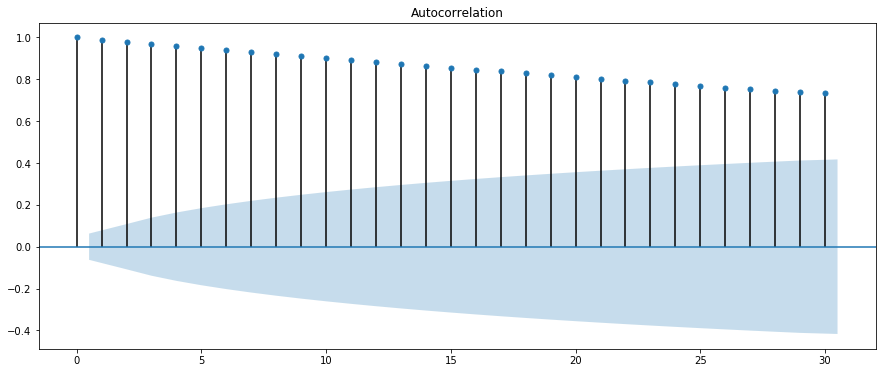

In [59]:
plot_acf(Colcapts,unbiased=False)
acf(Colcapts,unbiased=False)


In [29]:
help(pd.date_range)

Help on function date_range in module pandas.core.indexes.datetimes:

date_range(start=None, end=None, periods=None, freq=None, tz=None, normalize=False, name=None, closed=None, **kwargs)
    Return a fixed frequency DatetimeIndex.
    
    Parameters
    ----------
    start : str or datetime-like, optional
        Left bound for generating dates.
    end : str or datetime-like, optional
        Right bound for generating dates.
    periods : integer, optional
        Number of periods to generate.
    freq : str or DateOffset, default 'D'
        Frequency strings can have multiples, e.g. '5H'. See
        :ref:`here <timeseries.offset_aliases>` for a list of
        frequency aliases.
    tz : str or tzinfo, optional
        Time zone name for returning localized DatetimeIndex, for example
        'Asia/Hong_Kong'. By default, the resulting DatetimeIndex is
        timezone-naive.
    normalize : bool, default False
        Normalize start/end dates to midnight before generating dat

In [10]:
PIBdf=pd.ExcelFile('/Users/sergiocalderonv/Documents/Documentos Mac Book Sergio/Cursos/Time Series/Series de Tiempo Univariadas 2020-I/Bases/PIB.xlsx')
print(PIBdf.sheet_names)
#Data Frame de la hoja "Datos"
df=PIBdf.parse('Hoja1')

ind = pd.date_range(start='1/2005', periods=59, freq='Q')
len(ind)
PIBts =pd.Series(df['PIB'].values,index=ind)
#SerieInt
type(PIBts)
print(ind)
print(PIBts)



['Hoja1', 'INFO']


59

pandas.core.series.Series

DatetimeIndex(['2005-03-31', '2005-06-30', '2005-09-30', '2005-12-31',
               '2006-03-31', '2006-06-30', '2006-09-30', '2006-12-31',
               '2007-03-31', '2007-06-30', '2007-09-30', '2007-12-31',
               '2008-03-31', '2008-06-30', '2008-09-30', '2008-12-31',
               '2009-03-31', '2009-06-30', '2009-09-30', '2009-12-31',
               '2010-03-31', '2010-06-30', '2010-09-30', '2010-12-31',
               '2011-03-31', '2011-06-30', '2011-09-30', '2011-12-31',
               '2012-03-31', '2012-06-30', '2012-09-30', '2012-12-31',
               '2013-03-31', '2013-06-30', '2013-09-30', '2013-12-31',
               '2014-03-31', '2014-06-30', '2014-09-30', '2014-12-31',
               '2015-03-31', '2015-06-30', '2015-09-30', '2015-12-31',
               '2016-03-31', '2016-06-30', '2016-09-30', '2016-12-31',
               '2017-03-31', '2017-06-30', '2017-09-30', '2017-12-31',
               '2018-03-31', '2018-06-30', '2018-09-30', '2018-12-31',
      

In [1]:
%qtconsole

Text(0.5, 1.0, 'PIB Colombia')

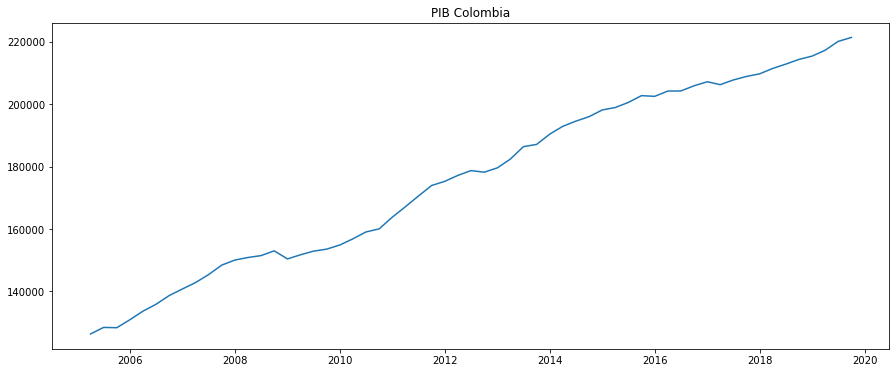

In [56]:
plt.plot(PIBts)
plt.title('PIB Colombia')

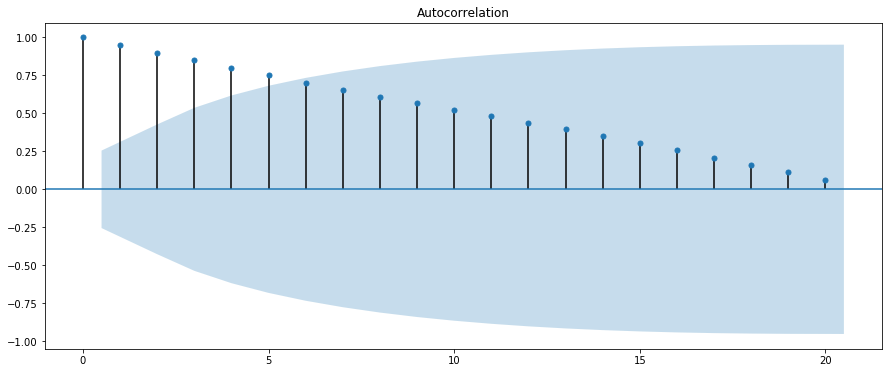

In [62]:

acfPIB=plot_acf(PIBts,lags=20,unbiased=False)

(0, 20)

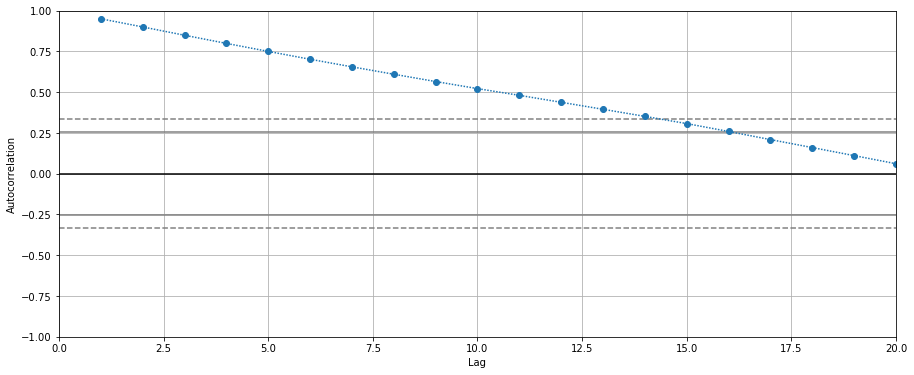

In [63]:
#!pip install --upgrade pandas
from pandas.plotting import autocorrelation_plot
ax =autocorrelation_plot(PIBts,marker="o",dashes= (1,0,0,1))
ax.set_xlim([0, 20])


In [64]:
plot_acf

<function statsmodels.graphics.tsaplots.plot_acf(x, ax=None, lags=None, *, alpha=0.05, use_vlines=True, unbiased=False, fft=False, missing='none', title='Autocorrelation', zero=True, vlines_kwargs=None, **kwargs)>

In [65]:
autocorrelation_plot

<function pandas.plotting._misc.autocorrelation_plot(series, ax=None, **kwargs)>

In [66]:
import inspect
lines = inspect.getsource(autocorrelation_plot)
print(lines)

def autocorrelation_plot(series, ax=None, **kwargs):
    """
    Autocorrelation plot for time series.

    Parameters
    ----------
    series : Time series
    ax : Matplotlib axis object, optional
    **kwargs
        Options to pass to matplotlib plotting method.

    Returns
    -------
    class:`matplotlib.axis.Axes`
    """
    plot_backend = _get_plot_backend("matplotlib")
    return plot_backend.autocorrelation_plot(series=series, ax=ax, **kwargs)



In [ ]:
Importación IPC

In [77]:
help(pd.to_datetime)

Help on function to_datetime in module pandas.core.tools.datetimes:

to_datetime(arg, errors='raise', dayfirst=False, yearfirst=False, utc=None, format=None, exact=True, unit=None, infer_datetime_format=False, origin='unix', cache=True)
    Convert argument to datetime.
    
    Parameters
    ----------
    arg : int, float, str, datetime, list, tuple, 1-d array, Series DataFrame/dict-like
        The object to convert to a datetime.
    errors : {'ignore', 'raise', 'coerce'}, default 'raise'
        - If 'raise', then invalid parsing will raise an exception.
        - If 'coerce', then invalid parsing will be set as NaT.
        - If 'ignore', then invalid parsing will return the input.
    dayfirst : bool, default False
        Specify a date parse order if `arg` is str or its list-likes.
        If True, parses dates with the day first, eg 10/11/12 is parsed as
        2012-11-10.
        with day first (this is a known bug, based on dateutil behavior).
    yearfirst : bool, defaul

['Hoja1']


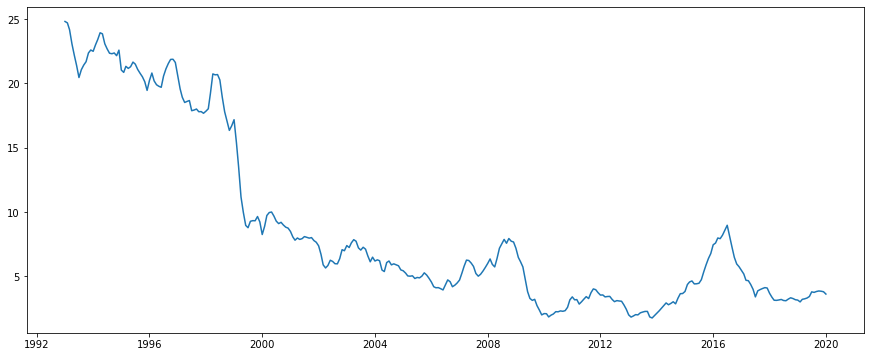

In [80]:
IPCdf=pd.ExcelFile('/Users/sergiocalderonv/Documents/Documentos Mac Book Sergio/Cursos/Time Series/Series de Tiempo Univariadas 2020-I/Bases/IPC.xlsx')
print(IPCdf.sheet_names)
df=IPCdf.parse('Hoja1')
df

df['Fecha']=pd.to_datetime(df['Fecha'])###Sólo es necesario si no tiene formato de fecha
####También se puede usar pd.DatetimeIndex
IPC=df.set_index('Fecha')
type(IPC)
IPCts=IPC['Inflaciontotal']
plt.plot(IPCts)


Fecha
1993-01-01    24.82
1993-02-01    24.71
1993-03-01    24.18
1993-04-01    23.08
1993-05-01    22.21
              ...  
2019-09-01     3.82
2019-10-01     3.86
2019-11-01     3.84
2019-12-01     3.80
2020-01-01     3.62
Name: Inflaciontotal, Length: 325, dtype: float64